[*********************100%%**********************]  1 of 1 completed


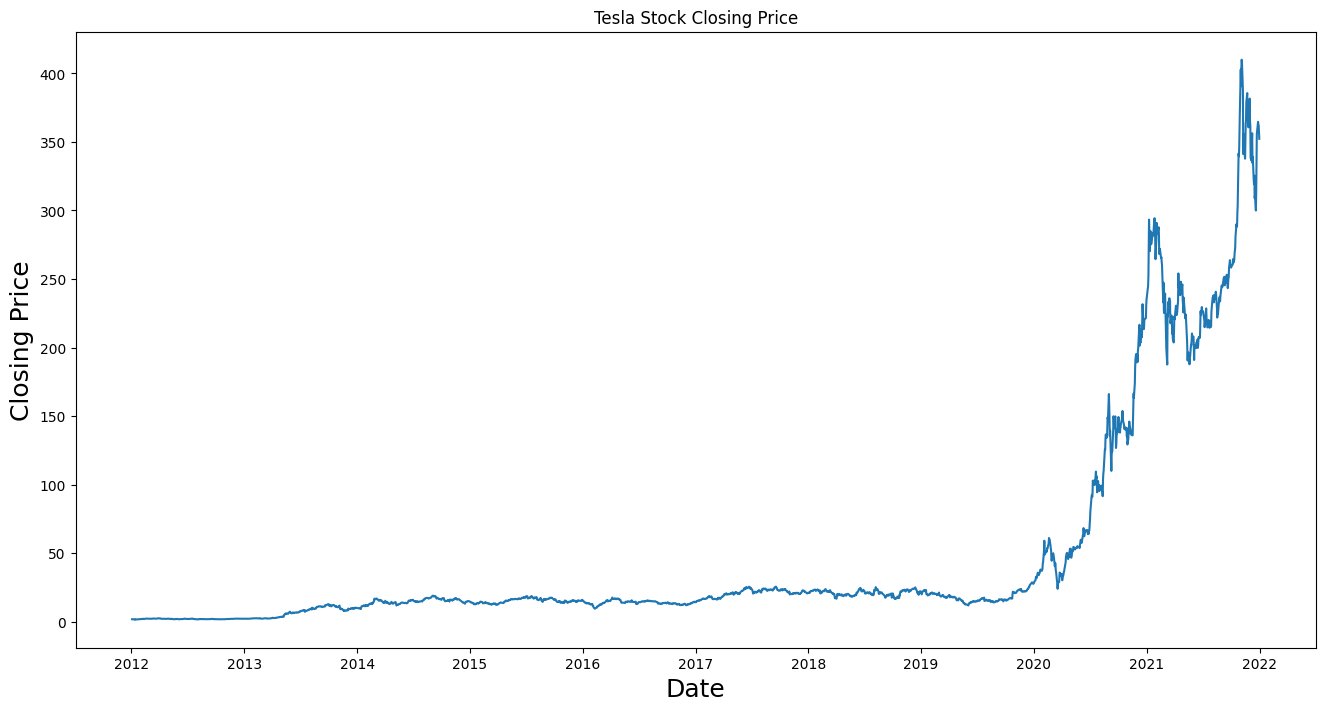

In [2]:
#load stock data for Tesla using pandas data reader                                                                                                              
#and plot the closing price for the last 5 years                                                                                                                 
                                                                                                                                                                    
import yfinance as yf                                                                                                                             
import datetime                                                                                                                                                  
import matplotlib.pyplot as plt                                                                                                                                  
import pandas as pd                                                                                                                                              
import numpy as np                                                                                                                                               
                                                                                                                                                                    
#set start and end dates                                                                                                                                         
start = datetime.datetime(2012, 1, 1)                                                                                                                            
end = datetime.datetime(2022, 1, 1)                                                                                                                              
                                                                                                                                                                    
#load stock data for Tesla                                                                                                                                       
tesla = yf.download('TSLA', start=start, end=end)                                                                                                              
                                                                                                                                                                    
#plot the closing price for the last 5 years                                                                                                                     
plt.figure(figsize=(16,8))                                                                                                                                       
plt.title('Tesla Stock Closing Price')                                                                                                                           
plt.plot(tesla['Close'])                                                                                                                                         
plt.xlabel('Date', fontsize=18)                                                                                                                                  
plt.ylabel('Closing Price', fontsize=18)                                                                                                                         
plt.show() 

# Calculating financial indicators

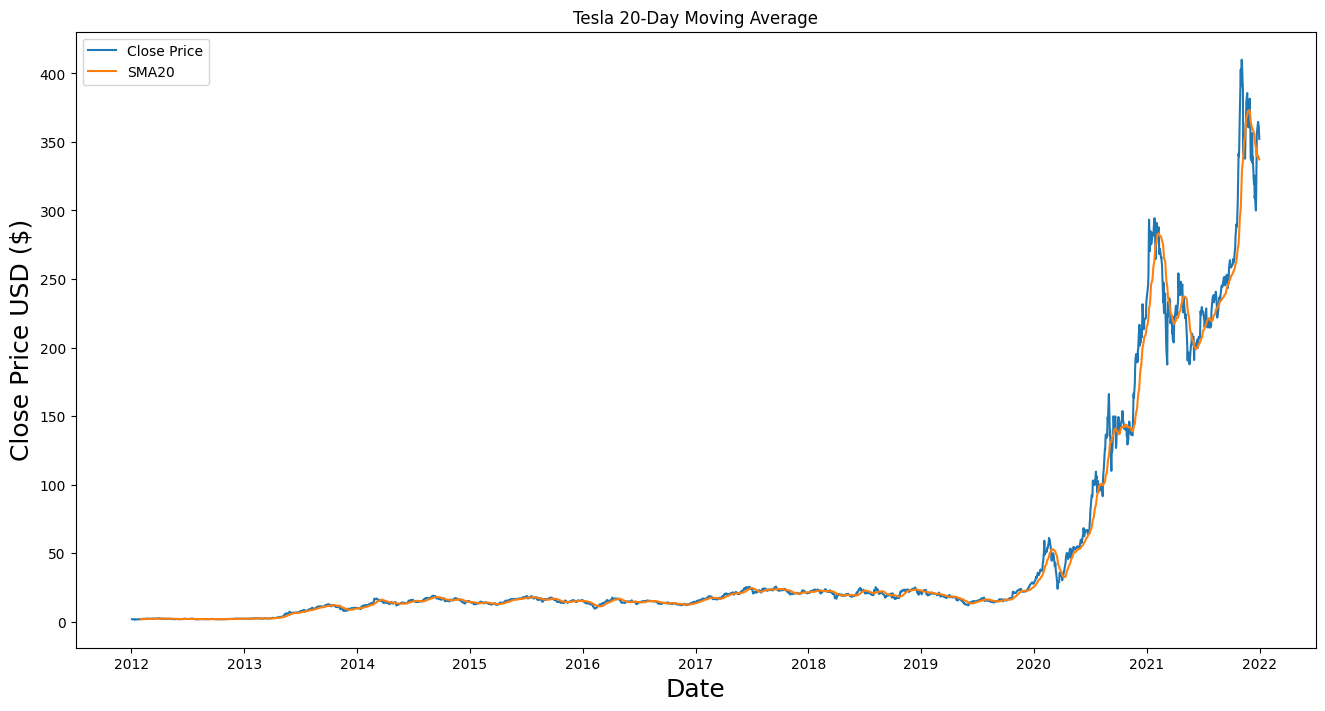

In [19]:
# Calculate 20-day moving average
SMA20 = tesla['Close'].rolling(window=20).mean()

# Plot the closing prices along with the 20-day moving average
plt.figure(figsize=(16,8))
plt.title('Tesla 20-Day Moving Average')
plt.plot(tesla['Close'], label='Close Price')
plt.plot(SMA20, label='SMA20')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()


# Backtesting

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03    1.929333    1.966667    1.843333    1.872000    1.872000   
2012-01-04    1.880667    1.911333    1.833333    1.847333    1.847333   
2012-01-05    1.850667    1.862000    1.790000    1.808000    1.808000   
2012-01-06    1.813333    1.852667    1.760667    1.794000    1.794000   
2012-01-09    1.800000    1.832667    1.741333    1.816667    1.816667   
...                ...         ...         ...         ...         ...   
2021-12-27  357.890015  372.333344  356.906677  364.646667  364.646667   
2021-12-28  369.829987  373.000000  359.473328  362.823334  362.823334   
2021-12-29  366.213318  368.000000  354.713318  362.063324  362.063324   
2021-12-30  353.776672  365.183319  351.049988  356.779999  356.779999   
2021-12-31  357.813324  360.666656  351.529999  352.260010  352.260010   

              Volume  Rolling Mean  B

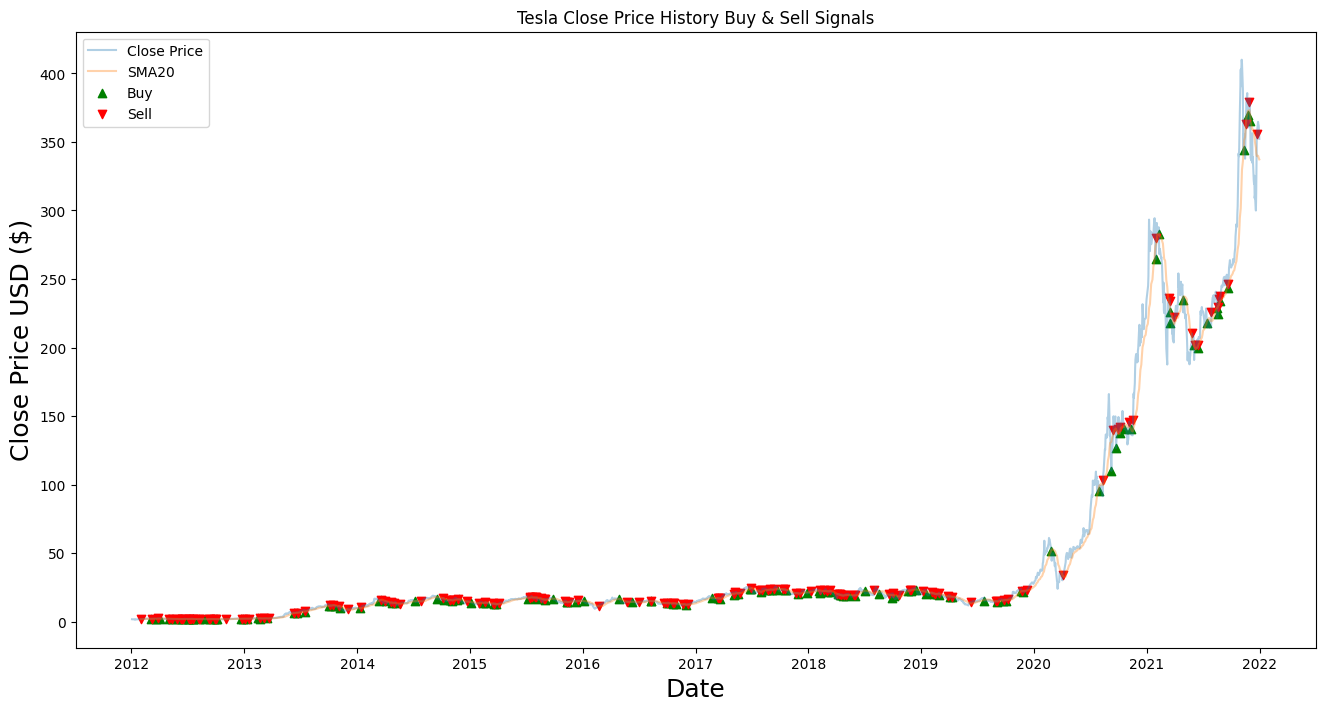

In [20]:
# Backtesting strategy
# Create a new DataFrame
data = tesla.copy()
data['SMA20'] = SMA20

# Function to signal when to buy and sell an asset
def buy_sell_signal(data):
    """
    This function generates buy and sell signals based on the crossover of the price and the 20-day moving average.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing 'Close' and 'SMA20' columns
    
    Returns:
    tuple: Lists containing buy and sell signals
    """
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data['SMA20'].iloc[i] > data['Close'].iloc[i]:
            if flag != 1:
                sigPriceBuy.append(data['Close'].iloc[i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA20'].iloc[i] < data['Close'].iloc[i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Close'].iloc[i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

# Store the buy and sell data into a variable
buy_sell_data = buy_sell_signal(data)

# Create two new columns
data['Buy_Signal_Price'] = buy_sell_data[0]
data['Sell_Signal_Price'] = buy_sell_data[1]

# Show the data
print(data)

# Visualize the data and strategy to buy and sell the stock
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price', alpha=0.35)
plt.plot(data['SMA20'], label='SMA20', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('Tesla Close Price History Buy & Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

            Adj Close
Date                 
2012-01-03   0.000000
2012-01-04  -0.013177
2012-01-05  -0.021292
2012-01-06  -0.007743
2012-01-09   0.012635
...               ...
2021-12-27   0.025248
2021-12-28  -0.005000
2021-12-29  -0.002095
2021-12-30  -0.014592
2021-12-31  -0.012669

[2517 rows x 1 columns]


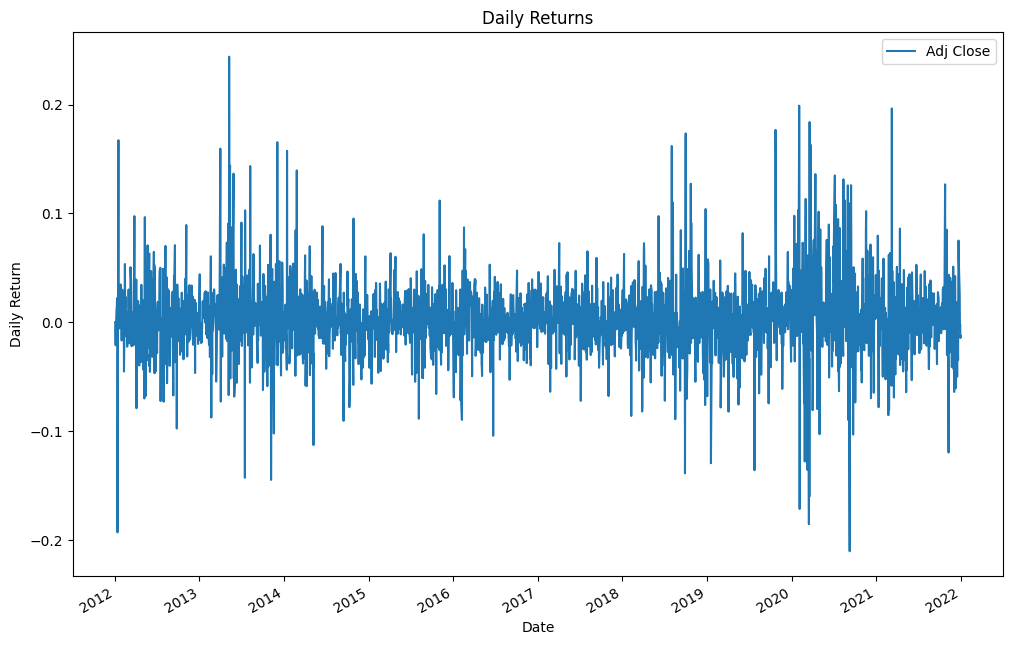

            Adj Close
Date                 
2012-01-03        NaN
2012-01-04  -0.013264
2012-01-05  -0.021522
2012-01-06  -0.007773
2012-01-09   0.012556
...               ...
2021-12-27   0.024935
2021-12-28  -0.005013
2021-12-29  -0.002097
2021-12-30  -0.014700
2021-12-31  -0.012750

[2517 rows x 1 columns]


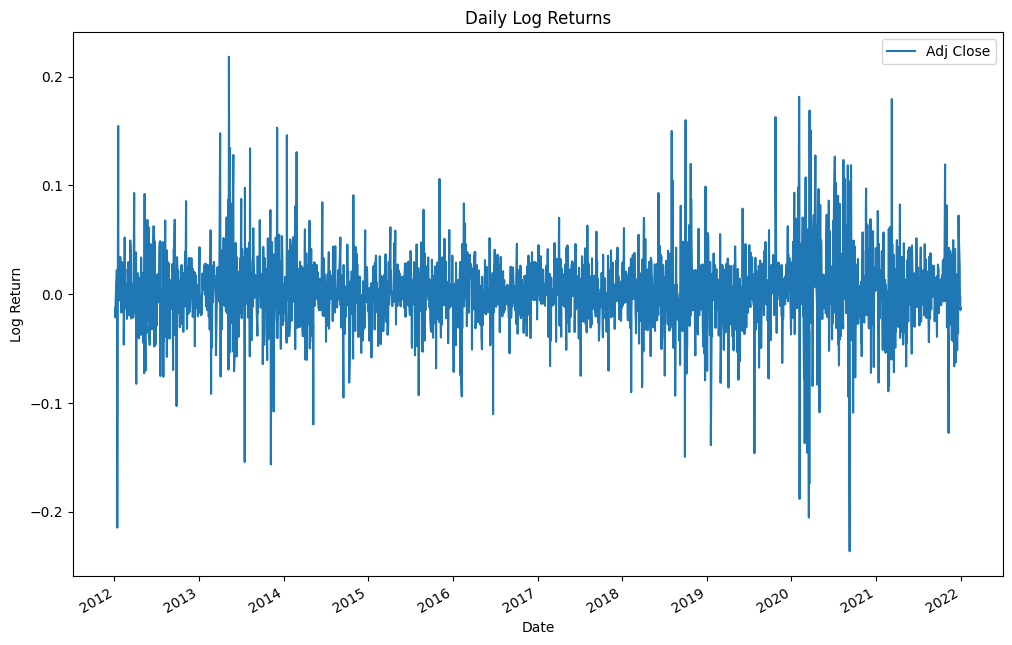

             Adj Close
Date                  
2012-01-03    1.000000
2012-01-04    0.986823
2012-01-05    0.965812
2012-01-06    0.958333
2012-01-09    0.970442
...                ...
2021-12-27  194.789889
2021-12-28  193.815886
2021-12-29  193.409897
2021-12-30  190.587608
2021-12-31  188.173084

[2517 rows x 1 columns]


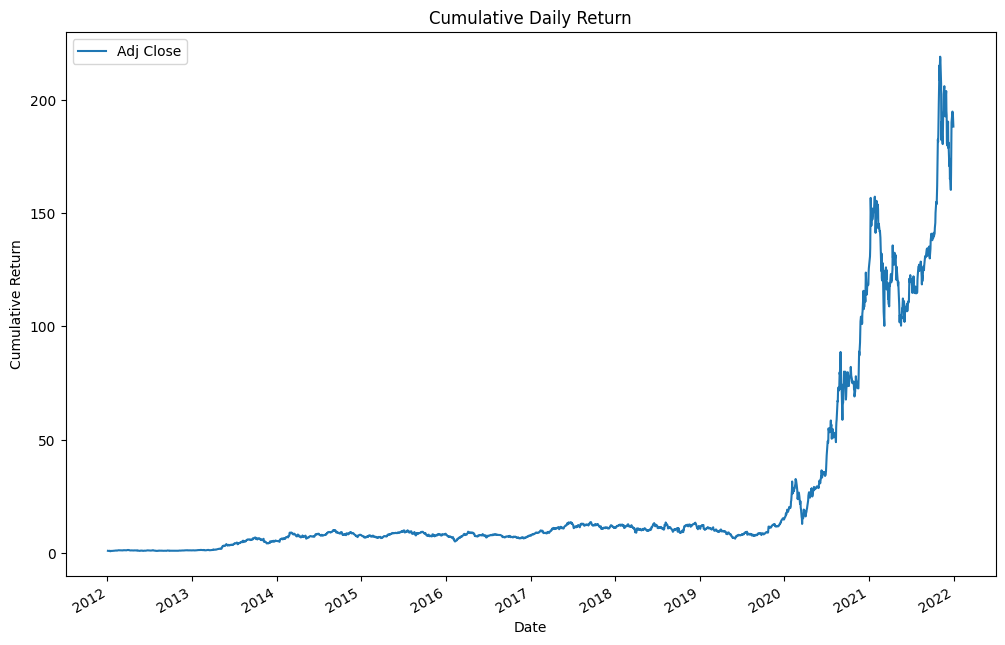

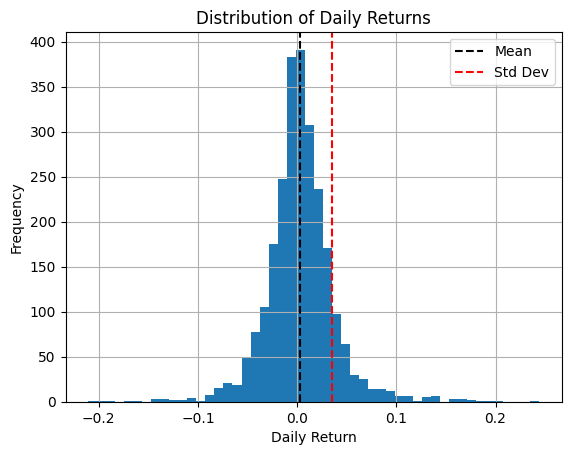

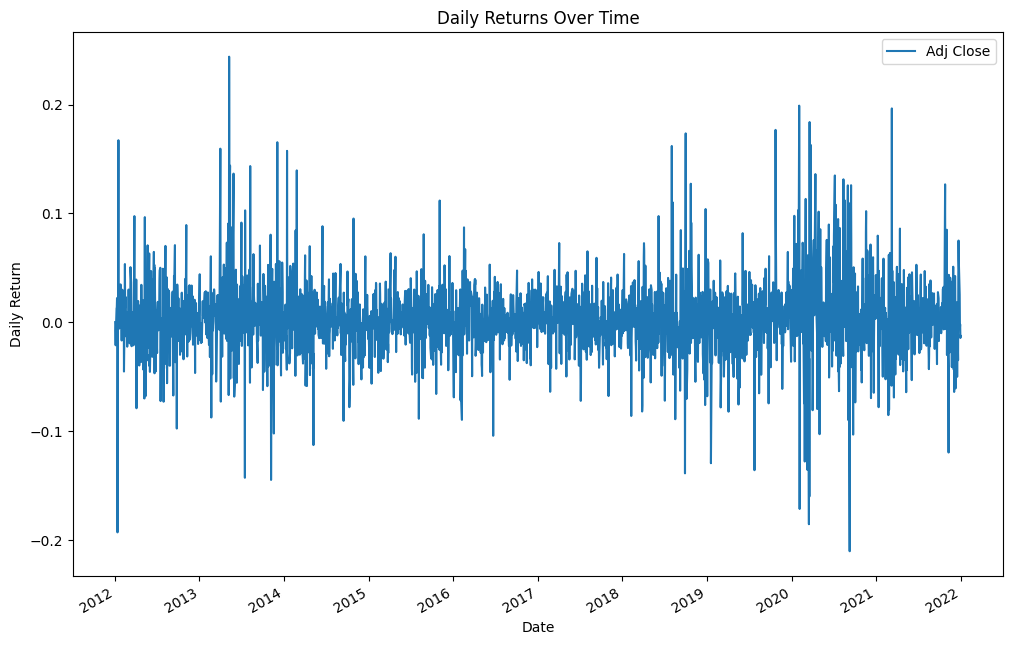

In [21]:
# Compute the daily returns
daily_close = tesla[['Adj Close']]
# Compute daily returns
daily_pct_change = daily_close.pct_change()
# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change)

# Plot daily returns
daily_pct_change.plot(figsize=(12,8))
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

# Compute log returns
daily_log_returns = np.log(daily_close.pct_change() + 1)
print(daily_log_returns)

# Plot log returns
daily_log_returns.plot(figsize=(12,8))
plt.title('Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

# Compute cumulative returns
cum_daily_return = (1 + daily_pct_change).cumprod()
print(cum_daily_return)

# Plot cumulative returns
cum_daily_return.plot(figsize=(12,8))
plt.title('Cumulative Daily Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

# Plot the distribution of daily_pct_change
daily_pct_change.hist(bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.axvline(x=daily_pct_change['Adj Close'].mean(), color='k', linestyle='--', label='Mean')
plt.axvline(x=daily_pct_change['Adj Close'].std(), color='r', linestyle='--', label='Std Dev')
plt.legend()
plt.show()

# Plot the daily returns of Tesla
daily_pct_change.plot(figsize=(12,8))
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

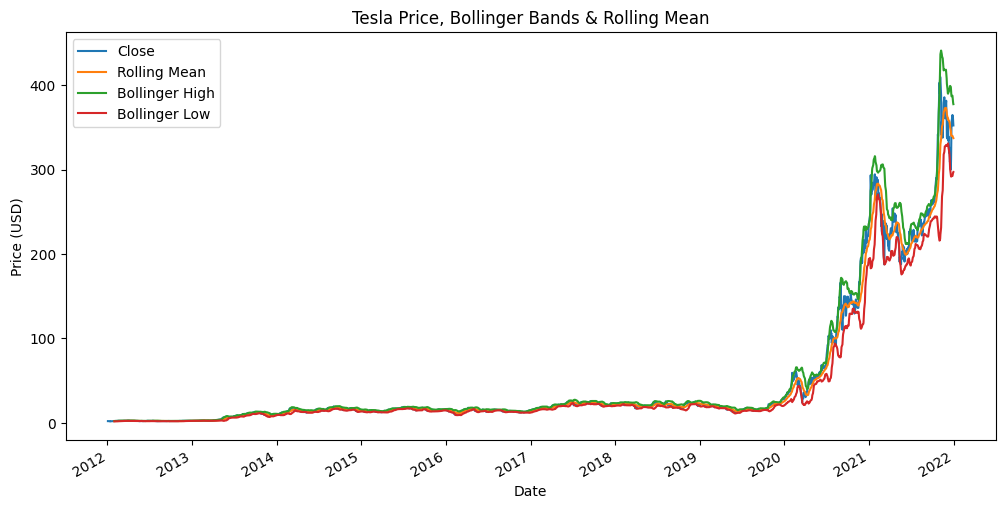

In [11]:
#Compute Bollinger Bands

#set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 20
no_of_std = 2

#compute rolling mean and standard deviation using number of days set above
rolling_mean = tesla['Close'].rolling(window).mean()
rolling_std = tesla['Close'].rolling(window).std()

#create two new DataFrame columns to hold values of upper and lower Bollinger bands
tesla['Rolling Mean'] = rolling_mean
tesla['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
tesla['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

#plot Tesla price, rolling mean and Bollinger Bands
tesla[['Close', 'Rolling Mean', 'Bollinger High', 'Bollinger Low']].plot(figsize=(12,6))
plt.title('Tesla Price, Bollinger Bands & Rolling Mean')
plt.ylabel('Price (USD)')
plt.show()

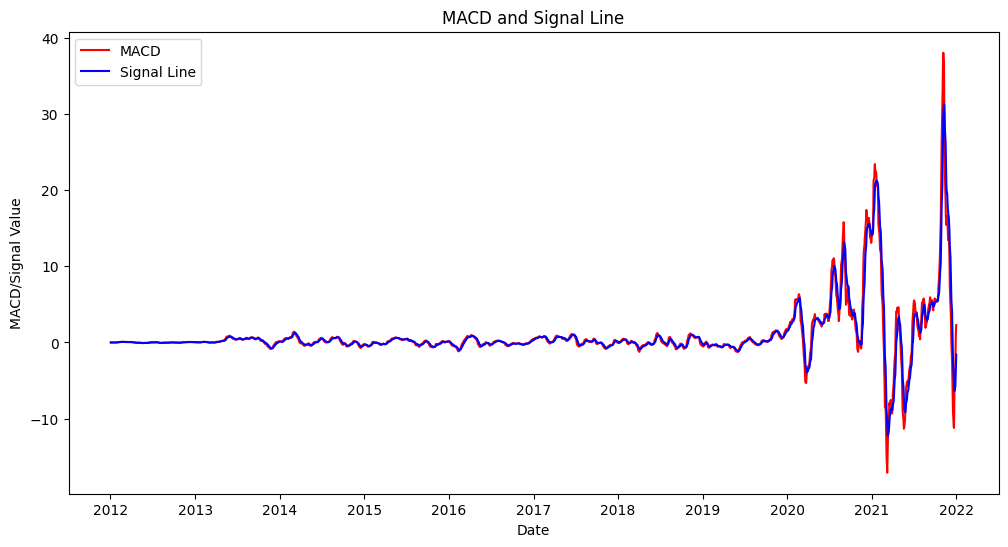

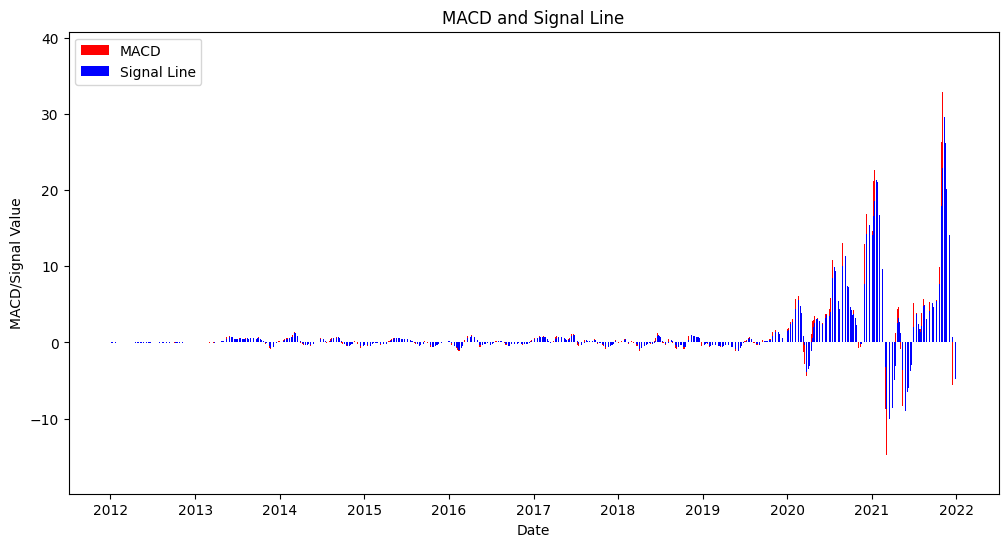

In [18]:
#compute Moving Average Convergence Divergence (MACD)

#compute the 12 day EMA
ema_12 = tesla.Close.ewm(span=12).mean()

#compute the 26 day EMA
ema_26 = tesla.Close.ewm(span=26).mean()

#compute the MACD line
macd = ema_12 - ema_26

#compute the signal line
signal = macd.ewm(span=9).mean()

#plot the MACD and signal line with histogram
plt.figure(figsize=(12,6))
plt.plot(macd, label='MACD', color='red')
plt.plot(signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
#title and labels
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD/Signal Value')
#plot histogram
plt.figure(figsize=(12,6))
plt.bar(macd.index, macd, label='MACD', color='red')
plt.bar(signal.index, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
#title and labels
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD/Signal Value')
plt.show()




##### When the MACD line (red) and the signal line (blue) overlap or are very close to each other, it indicates that there is a lack of clear momentum or trend in the stock's price movement. The stock may be experiencing a period of consolidation. 

##### When the MACD line (red) crosses above the signal line (blue), it is generally considered a bullish signal, indicating that it might be a good time to buy. The fact that the MACD line has a higher amplitude (further away from the zero line) towards the end suggests increasing bullish momentum.

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `daily_pct_change` has been calculated previously in your script
# Calculate the annualized average return and standard deviation
annual_avg_return = daily_pct_change.mean() * 252
annual_std_dev = daily_pct_change.std() * np.sqrt(252)

# Assuming a risk-free rate of 1% (you can change this as per the current risk-free rate)
risk_free_rate = 0.01

# Calculate the Sharpe Ratio
sharpe_ratio = (annual_avg_return - risk_free_rate) / annual_std_dev
print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: Adj Close    1.200866
dtype: float64


In [27]:
import yfinance as yf

# Get the Tesla stock data
tesla_stock = yf.Ticker("TSLA")

# Get company financials
income_statement = tesla_stock.financials
balance_sheet = tesla_stock.balance_sheet
cash_flow = tesla_stock.cashflow

# Display financial statements
print("Income Statement:")
print(income_statement)
print("\nBalance Sheet:")
print(balance_sheet)
print("\nCash Flow Statement:")
print(cash_flow)

# calculate various financial ratios here
# calculate the current ratio
current_ratio = balance_sheet.loc["Total Current Assets"] / balance_sheet.loc["Total Current Liabilities"]
print("Current Ratio:", current_ratio)



Income Statement:
                                                       2022-12-31  \
Tax Effect Of Unusual Items                           -14080000.0   
Tax Rate For Calcs                                           0.08   
Normalized EBITDA                                   17833000000.0   
Total Unusual Items                                  -176000000.0   
Total Unusual Items Excluding Goodwill               -176000000.0   
Net Income From Continuing Operation Net Minori...  12583000000.0   
Reconciled Depreciation                              3747000000.0   
Reconciled Cost Of Revenue                          60609000000.0   
EBITDA                                              17657000000.0   
EBIT                                                13910000000.0   
Net Interest Income                                   106000000.0   
Interest Expense                                      191000000.0   
Interest Income                                       297000000.0   
Normalized Incom

KeyError: 'Total Current Assets'

Mean Squared Error: 3452.285349041997


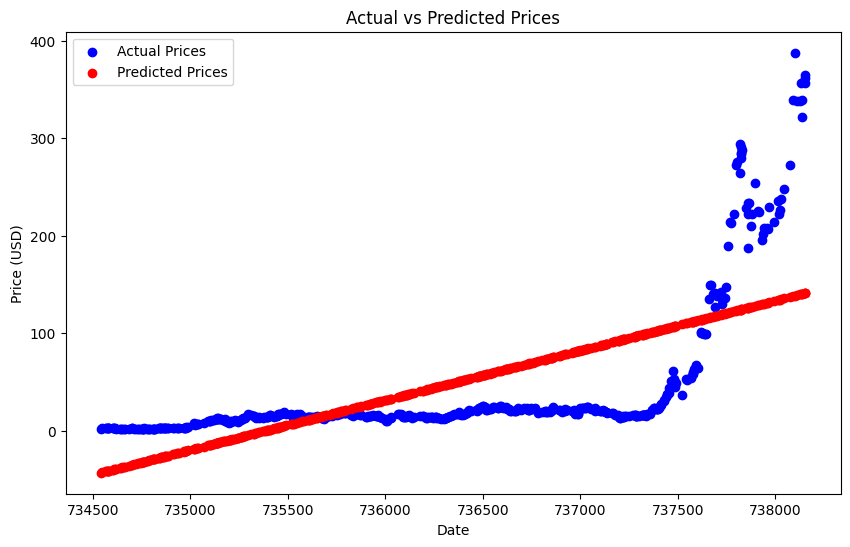

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dt

# Preparing data (assuming `tesla` DataFrame has Date as index and contains 'Close' column)
tesla['Date_ordinal'] = tesla.index.map(dt.datetime.toordinal)
X = tesla[['Date_ordinal']]
y = tesla['Close']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualization of predictions
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()